In [ ]:

%%capture

### RUN THIS CELL BUT DO NOT TOUCH THE CODE BELOW
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%pip install git+https://github.com/HowToBeCalculated/prof-harris-grader
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Import Data

In [ ]:
df=pd.read_csv("Bakery.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
total_orders = df["TransactionNo"].unique().size
print(total_orders)

9465


In [ ]:
p = df.groupby("TransactionNo").count()
prod_items = p["Items"]
items_avg = prod_items.mean()
items_avg

2.1666138404648705

EDA

In [ ]:
itemFrequency = df['Items'].value_counts().sort_values(ascending=False)
itemFrequency.head(20)

Items
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: count, dtype: int64

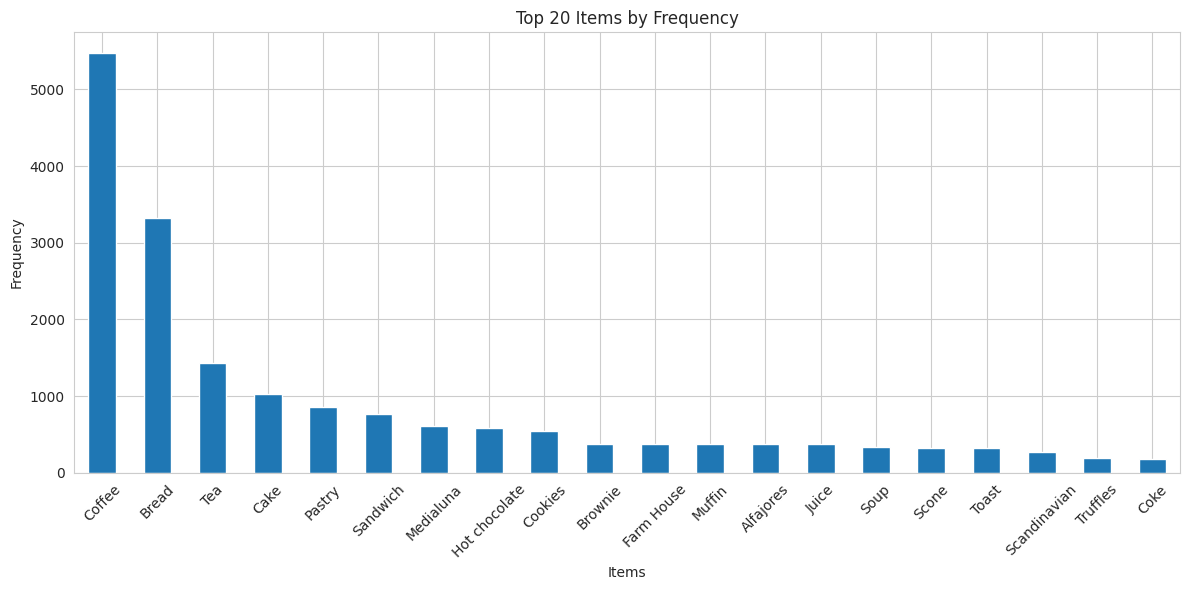

In [ ]:
 # Create a bar chart
plt.figure(figsize=(12, 6))
itemFrequency.head(20).plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top 20 Items by Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [ ]:
peakHours = df.groupby('Daypart')['Items'].count().sort_values(ascending=False)
peakHours

Daypart
Afternoon    11569
Morning       8404
Evening        520
Night           14
Name: Items, dtype: int64

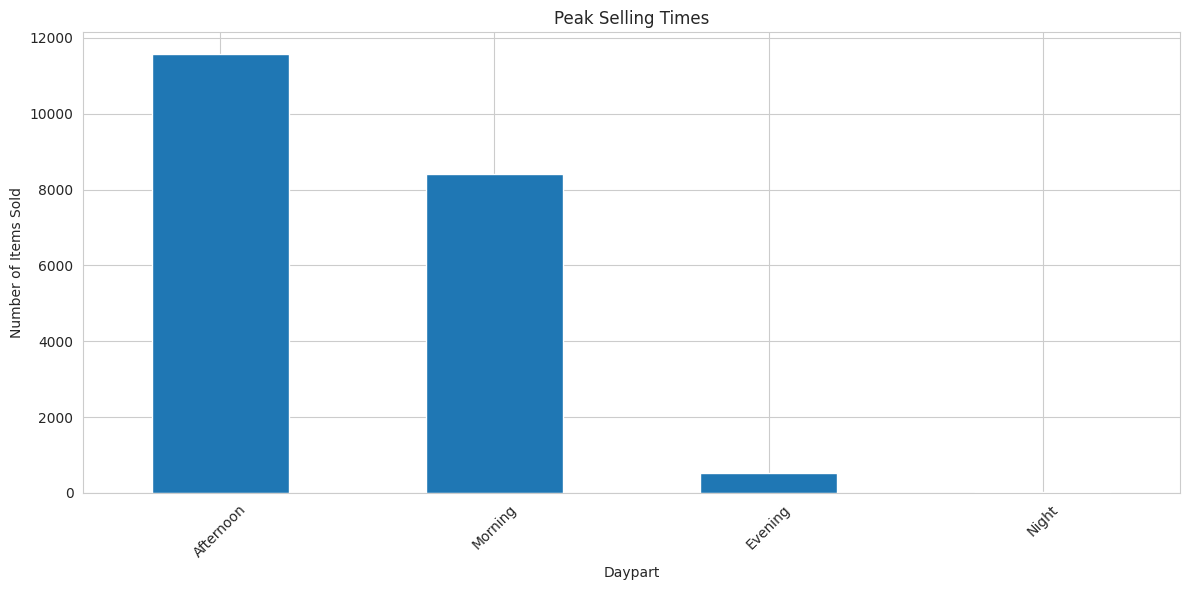

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
peakHours.plot(kind='bar')
plt.xlabel('Daypart')
plt.ylabel('Number of Items Sold')
plt.title('Peak Selling Times')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Axes: xlabel='DateTime'>

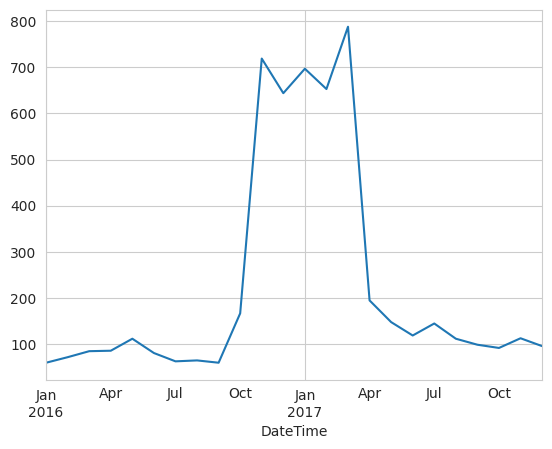

In [ ]:
mask = (df['Items'] == 'Coffee')
processed = df[mask].groupby(pd.to_datetime(df['DateTime']).dt.date + pd.offsets.MonthEnd(0))['Items'].count()

processed.plot()

In [ ]:
dateTime=pd.to_datetime(df['DateTime'])
df['Day']=dateTime.dt.day_name()
df['Month']=dateTime.dt.month_name()
df['Year']=dateTime.dt.year
df.head(5)

,TransactionNo,Items,DateTime,Daypart,DayType,Day,Month,Year
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,Sunday,October,2016
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,Sunday,October,2016
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,Sunday,October,2016
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,Sunday,October,2016
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,Sunday,October,2016


In [ ]:
mpd = df.groupby('Day')['Items'].count().sort_values(ascending=False)
mpd

Day
Saturday     3554
Friday       3266
Sunday       3118
Monday       3035
Tuesday      2645
Thursday     2601
Wednesday    2288
Name: Items, dtype: int64

In [ ]:
mpm = df.groupby('Month')['Items'].count().sort_values(ascending=False)
mpm

Month
March        3220
November     3076
January      3027
February     2748
December     2647
April        1048
October      1041
May           924
July          741
June          739
August        700
September     596
Name: Items, dtype: int64

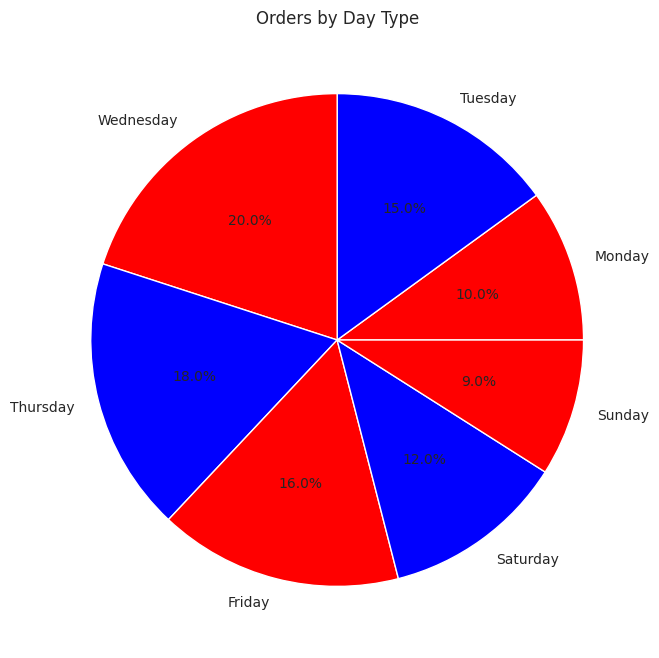

In [ ]:
# Assuming order_weekday is a pandas Series or DataFrame with the number of orders for each weekday
order_weekday = pd.Series([100, 150, 200, 180, 160, 120, 90], index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Assuming total_orders is the total number of orders
total_orders = order_weekday.sum()

# Assuming num_perc is a formatting string for displaying percentages on the pie chart
num_perc = '%.1f%%'

# Assuming color1 and color3 are color variables for the pie chart slices
color1 = 'red'
color3 = 'blue'

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(order_weekday,
        labels=order_weekday.index,
        autopct=num_perc,
        colors=[color1, color3])
plt.title("Orders by Day Type")
plt.show()

Association Rules

In [ ]:
items=df['Items'].value_counts().reset_index()
print(f"The top 5 highest selling items in terms of quantity are: \n \n {items.head()}")

The top 5 highest selling items in terms of quantity are: 
 
     Items  count
0  Coffee   5471
1   Bread   3325
2     Tea   1435
3    Cake   1025
4  Pastry    856


In [ ]:
print(f"The top 10 least selling items in terms of quantity are: \n \n {items.tail(10)}")

The top 10 least selling items in terms of quantity are: 
 
               Items  count
84  Chimichurri Oil      2
85         Siblings      2
86     Chicken sand      1
87         The BART      1
88       Adjustment      1
89            Bacon      1
90     Gift voucher      1
91   Olum & polenta      1
92         Raw bars      1
93          Polenta      1


In [ ]:
transactions=[]
for item in df['TransactionNo'].unique():
    lst=list(set(df[df['TransactionNo']==item]['Items']))
    transactions.append(lst)

transactions[0:10]

[['Bread'],
 ['Scandinavian'],
 ['Jam', 'Cookies', 'Hot chocolate'],
 ['Muffin'],
 ['Coffee', 'Bread', 'Pastry'],
 ['Muffin', 'Medialuna', 'Pastry'],
 ['Coffee', 'Medialuna', 'Tea', 'Pastry'],
 ['Bread', 'Pastry'],
 ['Bread', 'Muffin'],
 ['Medialuna', 'Scandinavian']]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Data Preprocessing
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

print(len(df))
df.head()

9465


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


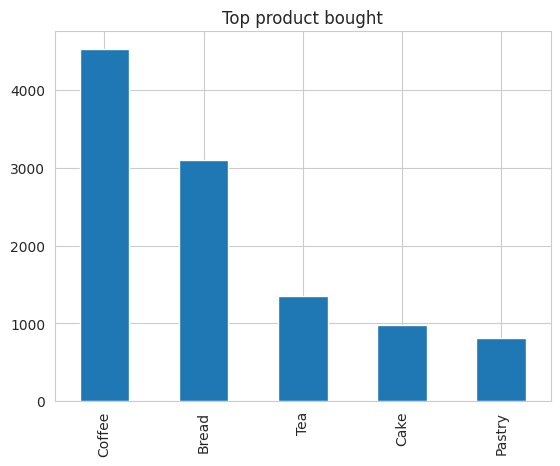

In [ ]:
df.sum().sort_values(ascending=False).head().plot(kind='bar', title='Top product bought')

plt.show()

In [ ]:
df[df['Coffee']].sum().sort_values()

Adjustment             0
Valentine's card       0
The BART               0
Spread                 0
Siblings               0
                    ... 
Pastry               450
Tea                  472
Cake                 518
Bread                852
Coffee              4528
Length: 94, dtype: int64

In [ ]:
# Find top products that users buy with mineral water
product_name = 'Coffee'

df[df[product_name]].sum().sort_values(ascending=False).drop(product_name).head()

# Are these items just common or affect product sales?
# Does the inclusion of each of these products mean more likelihood of buying the product?

Bread       852
Cake        518
Tea         472
Pastry      450
Sandwich    362
dtype: int64

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Applying Apriori
frequent_itemsets = apriori(df, min_support=0.0045, use_colnames=True)

# Mining Association Rules (https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Displaying Rules (excluding some metrics, project team may want to look into these)
rules = rules[rules.columns[:7]]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515
2,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723
3,(Frittata),(Coffee),0.008558,0.478394,0.004543,0.530864,1.109680
4,(Hearty & Seasonal),(Coffee),0.010565,0.478394,0.005705,0.540000,1.128777
5,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311
6,(Jammie Dodgers),(Coffee),0.013207,0.478394,0.006656,0.504000,1.053525
7,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750
8,(Keeping It Local),(Coffee),0.006656,0.478394,0.005388,0.809524,1.692169
9,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878


FORECASTING

In [ ]:
df = pd.read_csv("Bakery.csv")

In [ ]:
df['Date'] = pd.to_datetime(df['DateTime']).dt.date

In [ ]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Date
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30


In [ ]:
# Items over time
df.set_index('Date')['TransactionNo'].count()

20507

<Axes: xlabel='Date'>

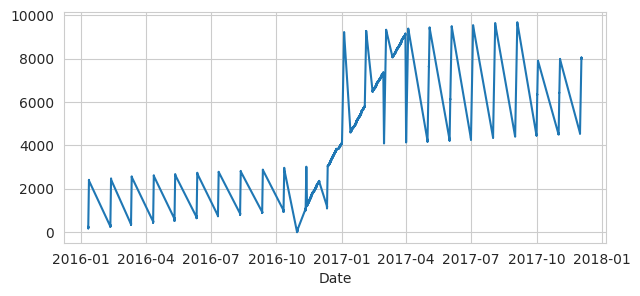

In [ ]:
df.set_index('Date')['TransactionNo'].plot(figsize=(7,3))

In [ ]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

def get_accuracy_of_forecast(forecast):
  to_plot = pd.concat(
      [
          train['Items'], test['Items'], forecast
      ],
      axis=1,
  ).set_index(flights['date'])

  to_plot.columns = ['train', 'actual', 'predicted']

  to_plot.plot()
  just_preds = to_plot.dropna(subset='actual')

  mape = round(mean_absolute_percentage_error(just_preds['actual'], just_preds['predicted']), 2)
  rmse = round(mean_squared_error(just_preds['actual'], just_preds['predicted'], squared=True), 2)

  title = f"MAPE: {mape} ~ RMSE: {rmse}"
  plt.suptitle(title)

  plt.show()

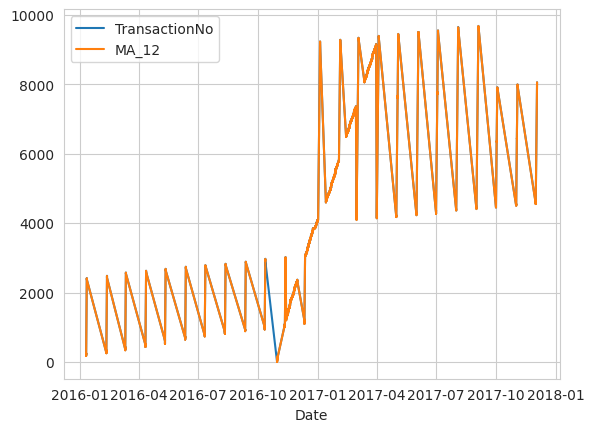

In [ ]:
moving_avg_train = train.copy()
moving_avg_train['MA_12'] = moving_avg_train['TransactionNo'].rolling(12).mean()

moving_avg_train.set_index('Date')[['TransactionNo', 'MA_12']].plot()
plt.show()

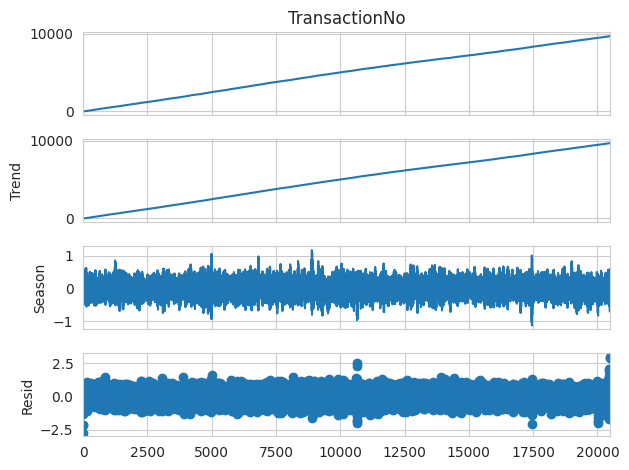

In [ ]:
from statsmodels.tsa.seasonal import STL

decomposed = STL(
    train['TransactionNo'],
    period=12, ## 12 as we are looking at monthly data and there's 12 months to a cycle
).fit()

decomposed.plot()

plt.show()

[]

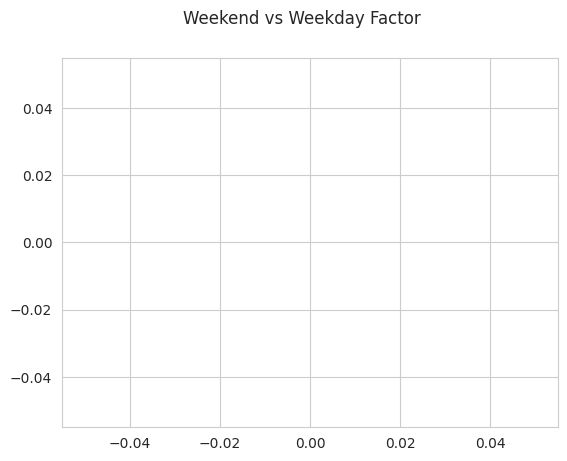

In [ ]:
#
factors = df.groupby('Date')['TransactionNo'].mean()
factors /= factors.mean()

plt.suptitle('Weekend vs Weekday Factor')
plt.plot()